# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**

**Deadline: OCT 22, 9 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Manthan Patel
*   Student Number: 1008247933

##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?   **284807** **[0.1]**
* What features in the dataset are present aside from the 28 main features?     **Time & Amount** **[0.1]**
* Which column contains the targets?   **Class** **[0.1]**
* To what do the target values correspond?  **There are two target values 0 is for valid transaction and 1 is for Fraud transaction** **[0.1]**

In [35]:
pip install wget

In [36]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [37]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [39]:
### YOUR CODE HERE ###
df.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [40]:
df.iloc[::,:7]

,Time,V1,V2,V3,V4,V5,V6
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921
...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708


In [41]:
#Answers of the questions
print("Total no. of Rows are: 284807")
print("Feature apart from 28 main features are: Time, Amount") #Check for class?
print("Target Column name is : Class")
print("There are two target values 0 is for valid transaction and 1 is for Fraud transaction")



Total no. of Rows are: 284807
Feature apart from 28 main features are: Time, Amount
Target Column name is : Class
There are two target values 0 is for valid transaction and 1 is for Fraud transaction



* What is the percentage of entries in the dataset for each class?   **99.8273** **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?   **0.1727** **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **Here we have very few data points of fraudulent catagory (0.17%), so distance based classifier like KNN will lead to wrong results(may give only valid category results even if data is invalid) as data is imbalanced**  **[0.2]**



In [42]:
### YOUR CODE HERE ###
print("Percentage amount of Valid transactions in the dataset are: %.4f " % (100*(df[df['Class'] == 0].shape[0]/df.shape[0])))
print("Percentage amount of Fraud transactions in the dataset are: %.4f " % (100*(df[df['Class'] == 1].shape[0]/df.shape[0])))

Percentage amount of Valid transactions in the dataset are: 99.8273 
Percentage amount of Fraud transactions in the dataset are: 0.1727 


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [43]:
### Split the data  ###

from sklearn.model_selection import train_test_split

#Splitting data of both class mixed
X_train, X_remaining, y_train, y_remaining = train_test_split(df[df.columns[:30]],df.get('Class'), train_size=0.7 , random_state = 0)
X_val,X_test,y_val,y_test = train_test_split(X_remaining,y_remaining,test_size = 0.5, random_state = 0)

index_non = np.where(y_train == 0)
index_fraud = np.where(y_train == 1)

#Creating separate training set for fraudulent and non fraudulent data
X_train_fraud = X_train.iloc[index_fraud][:]
X_train_non = X_train.iloc[index_non][:]



Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

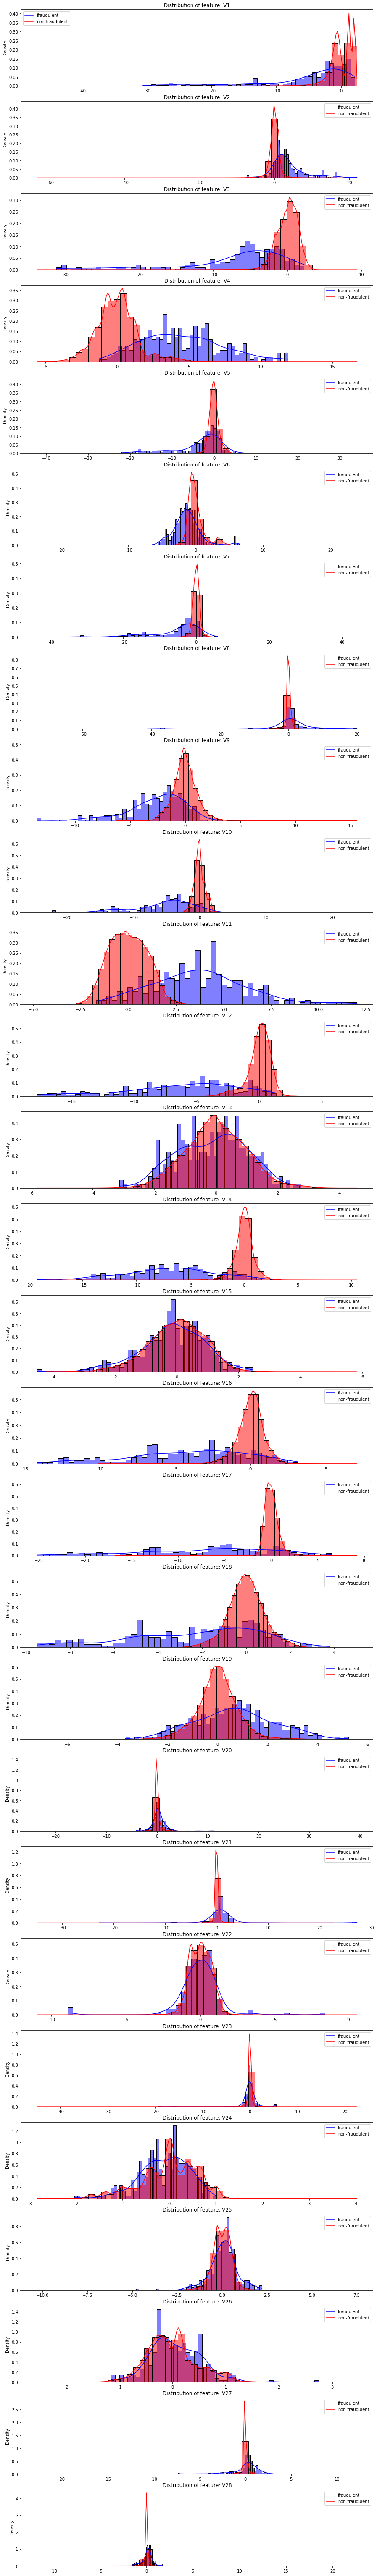

In [44]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**



1.   **Above shown graphs give us distribution of data for different features and for fradulent & non fraudulent category**
2.   **From these graphs we can get information about data that which features are useful for distinguishing fradulent and non-fraudulent data**
3. **If fraudulent & non-fraudulent gaussians are different and dishtinguishable we can easily determine that feature is good for data analysis**
4. **Also from number of hills in graph we can determine no of components in that particular gaussian.**



## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [45]:
### YOUR CODE HERE ###
#2a
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

gm = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
AUC_train = []
AUC_vali = []
C1_list = []
C2_list = []
for i in range(1,29):
    #print(feature)
    feature_train = X_train.iloc[::,i].values.reshape((-1,1))
    feature_vali = X_val.iloc[::,i].values.reshape((-1,1))
    gm.fit(feature_train)
    c1 = gm.score_samples(feature_train)
    c2 = gm.score_samples(feature_vali)
    C1_list.append(c1)
    C2_list.append(c2)
    AUC_train.append(roc_auc_score(y_train, 1-c1))
    AUC_vali.append(roc_auc_score(y_val, 1-c2))

d1= pd.DataFrame(data={'Features names':df.columns.values[1:29],'AUC_train': AUC_train,'AUC_vali': AUC_vali, 'C1_List': C1_list, 'C2_List': C2_list})  
#Sorting by AUC Validation values
d2 = d1.sort_values(by = 'AUC_vali', ascending=[False])
Best_features = np.array(d2['Features names'][0:3])
index_features = np.array(d2.index[0:3])
print("Top 3 features with max AUC for validation set : ", Best_features)
print("Index of top 3 features:", index_features)
d2

Top 3 features with max AUC for validation set :  ['V14' 'V10' 'V4']
Index of top 3 features: [13  9  3]


,Features names,AUC_train,AUC_vali,C1_List,C2_List
13,V14,0.952459,0.938073,"[-1.007247983800116, -0.8758930195249315, -1.5...","[-1.4202922792750017, -0.8749293709130178, -0...."
9,V10,0.913600,0.905959,"[-1.0631747450648952, -1.0079947977614023, -1....","[-2.040377374779983, -1.0128885883072634, -1.1..."
3,V4,0.892103,0.888283,"[-1.5149319454483836, -1.2708285497308802, -1....","[-1.890505564988529, -1.2955175235125966, -1.7..."
15,V16,0.902137,0.882852,"[-1.3751691847968732, -0.79088545649745, -0.79...","[-0.787597741441619, -0.8252371409274085, -1.3..."
10,V11,0.897175,0.882058,"[-1.073220619934629, -1.6392131666239262, -1.8...","[-0.9532052792346096, -1.7019650972123423, -1...."
16,V17,0.934852,0.881858,"[-0.8064931518543282, -1.0581644248234472, -1....","[-0.8593402095652002, -1.0242014308456917, -1...."
6,V7,0.862967,0.867423,"[-1.2051127228315814, -1.1360351116969818, -1....","[-1.207042631492508, -1.2733586923549283, -1.2..."
2,V3,0.876537,0.838364,"[-1.4270483386712483, -1.833189175414665, -1.8...","[-2.0013702922792826, -1.4049001270409203, -1...."
11,V12,0.920180,0.837909,"[-1.0448590728858782, -1.2704860658519825, -0....","[-0.9912851461461955, -0.9181326955044792, -1...."
1,V2,0.837499,0.837800,"[-1.4263652341964619, -1.4242253724669922, -1....","[-1.5739229966346764, -1.4547022090471569, -1...."


In [46]:
from sklearn.metrics import f1_score
list_of_index = []
F1_score_list = []
Threshold_values = []

for i in range(0,3):
    c2_max = max(d2['C2_List'][index_features[i]])
    c2_min = min(d2['C2_List'][index_features[i]])
    temp_th_list = []
    temp_score = []
    temp_score_final = []
    threshold_final = []
    for th in range(int(c2_min),int(c2_max),10):
        temp_score.append(f1_score(y_val,d2['C2_List'][index_features[i]]<th))
        temp_th_list.append(th)
    index_temp = temp_score.index(max(temp_score)) 
    threshold_temp = temp_th_list[index_temp]
    for th1 in range(threshold_temp - 10, threshold_temp + 10 ,1):
        temp_score_final.append(f1_score(y_val,d2['C2_List'][index_features[i]]<th1))
        threshold_final.append(th1)
    index_temp1 = temp_score_final.index(max(temp_score_final))
    F1_score_list.append(max(temp_score_final))
    Threshold_values.append(threshold_final[index_temp1])
d4= pd.DataFrame(data={'Index': index_features, 'Features names':Best_features, 'F1 Score': F1_score_list, 'Threshold_values': Threshold_values})
print(d4) 

   Index Features names  F1 Score  Threshold_values
0     13            V14  0.578512               -20
1      9            V10  0.255814               -58
2      3             V4  0.358491               -11


#Big Oh complexity

Here I have taken range of C2 for running loop for the first time in which I have calculated threshold value for every 10 value interval.


*    After that I have calculated threshold value for interval of +/- 10 value 
range for the value for which I got maximum threshold value.
*   So total calculations are n/10 + 20 for any range of n.


*   So here big oh complexity will be **n/10**







In [47]:
#2b
gm3 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
AUC_train_non = []
AUC_vali_non = []
C1_list_non = []
C2_list_non = []
for i in range(1,29):
    feature_train = X_train.iloc[::,i].values.reshape((-1,1))
    feature_vali = X_val.iloc[::,i].values.reshape((-1,1))
    feature_train_non = X_train_non.iloc[::,i].values.reshape((-1,1))
    gm3.fit(feature_train_non)
    c1_non = gm3.score_samples(feature_train)
    c2_non = gm3.score_samples(feature_vali)
    #print ("AUC of Gaussian Mixture" , format(  roc_auc_score(y_train, 1-c)  , ".3f")  )
    #print ("AUC of Gaussian Mixture" , format(  roc_auc_score(y_val, 1-c)  , ".3f")  )
    C1_list_non.append(c1_non)
    C2_list_non.append(c2_non)
    AUC_train_non.append(roc_auc_score(y_train, 1-c1_non))
    AUC_vali_non.append(roc_auc_score(y_val, 1-c2_non))
d4= pd.DataFrame(data={'Features names':df.columns.values[1:29],'AUC_train_non': AUC_train_non,'AUC_vali_non': AUC_vali_non, 'C1_List_non': C1_list_non, 'C2_List_non': C2_list_non})  
#Sorting by AUC Validation values
d5 = d4.sort_values(by = 'AUC_vali_non', ascending=[False])
Best_features_non = np.array(d5['Features names'][0:3])
index_features_non = np.array(d5.index[0:3])
print("Top 3 features with max AUC for validation set : ", Best_features_non)
print("Index of top 3 features:", index_features_non)
print(d5)

F1_score_list_non = []
Threshold_values_non = []

for i in range(0,3):
    c2_max = max(d5['C2_List_non'][index_features_non[i]])
    c2_min = min(d5['C2_List_non'][index_features_non[i]])
    temp_th_list = []
    temp_score = []
    temp_score_final = []
    threshold_final = []
    for th in range(int(c2_min),int(c2_max),10):
        temp_score.append(f1_score(y_val,d5['C2_List_non'][index_features_non[i]]<th))
        temp_th_list.append(th)
    index_temp = temp_score.index(max(temp_score)) 
    threshold_temp = temp_th_list[index_temp]
    for th1 in range(threshold_temp - 10, threshold_temp + 10 ,1):
        temp_score_final.append(f1_score(y_val,d5['C2_List_non'][index_features_non[i]]<th1))
        threshold_final.append(th1)
    index_temp1 = temp_score_final.index(max(temp_score_final))
    F1_score_list_non.append(max(temp_score_final))
    Threshold_values_non.append(threshold_final[index_temp1])



Top 3 features with max AUC for validation set :  ['V14' 'V10' 'V4']
Index of top 3 features: [13  9  3]
   Features names  ...                                        C2_List_non
13            V14  ...  [-1.4455216901439565, -0.811503668730307, -0.8...
9             V10  ...  [-2.102073279476725, -0.9730081813497657, -1.1...
3              V4  ...  [-1.8871809431186446, -1.286240939898883, -1.7...
15            V16  ...  [-0.7516858072638387, -0.7900632005620803, -1....
10            V11  ...  [-0.9387142215442719, -1.702787242506873, -1.6...
16            V17  ...  [-0.7539720628655151, -0.9869693013520482, -1....
6              V7  ...  [-1.1667597075111815, -1.2418097843307858, -1....
2              V3  ...  [-2.0270731189375124, -1.3739886717594172, -1....
11            V12  ...  [-0.9438213098678837, -0.8682166516739068, -0....
1              V2  ...  [-1.5647489332506401, -1.4443023219563527, -1....
27            V28  ...  [0.17549255569273803, 0.20066383129598342, 0.1...
4      

In [48]:
#Result comparison
d6= pd.DataFrame(data={'Index': index_features_non, 'Features names':Best_features_non, 'F1 Score non': F1_score_list_non, 'Threshold_values_non': Threshold_values_non,'F1 Score all': F1_score_list, 'Threshold_values all': Threshold_values})
d6 

,Index,Features names,F1 Score non,Threshold_values_non,F1 Score all,Threshold_values all
0,13,V14,0.590164,-22,0.578512,-20
1,9,V10,0.255814,-63,0.255814,-58
2,3,V4,0.360902,-9,0.358491,-11


**From the comparison of above table we can say that our results are not different as we have removed all fraudulent data and then trained our model.**

**So non-fraudulent model will not be trained for detecting fraudulent data.**

**Also amount of fraudulent data in main dataset is very less so it is not getting reflected that much in F1 score value for both calculation .**

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





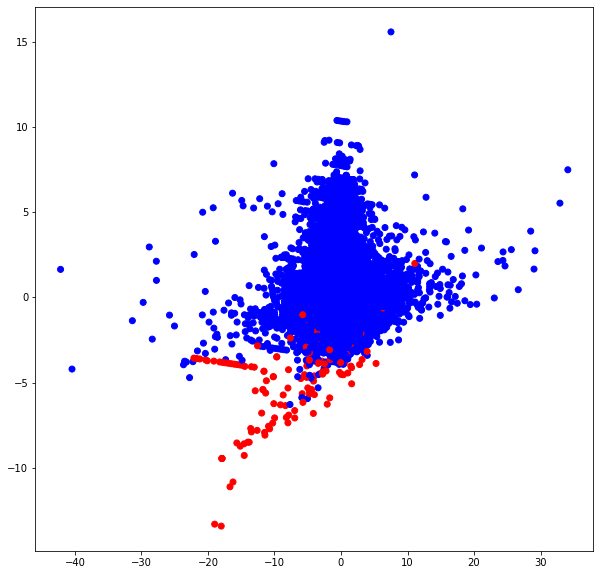

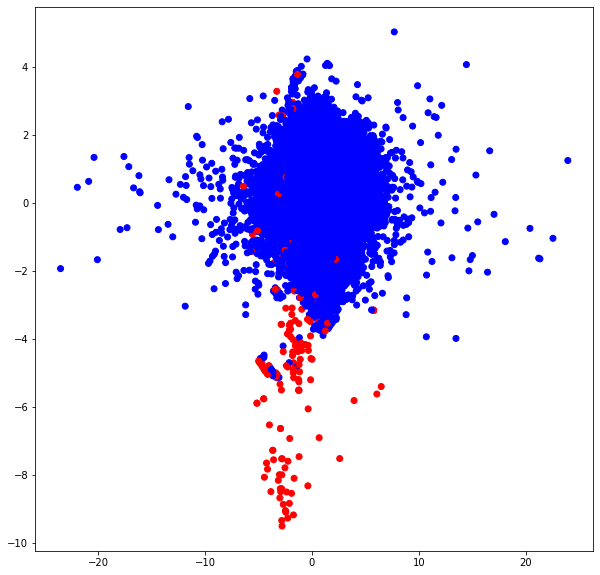

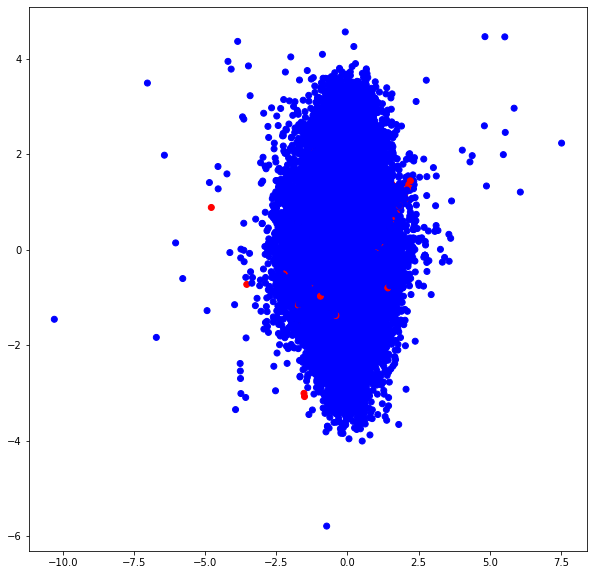

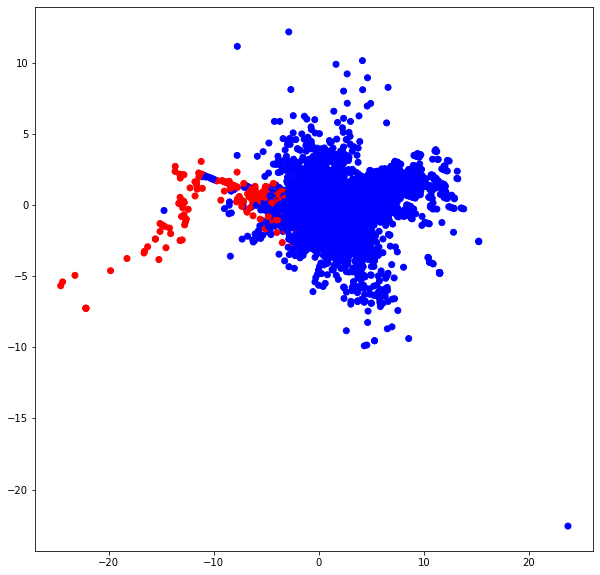

In [49]:
### YOUR CODE HERE ###
#Taking features V5 & V9
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(np.array(X_train['V5']),np.array(X_train['V9']),c=y_train, cmap='bwr')
plt.show()
#We need only one gausian as there is only one primary cluster for valid type of transactions.


#Taking features V6 & V18
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(np.array(X_train['V6']),np.array(X_train['V18']),c=y_train, cmap='bwr')
plt.show()
#We need only one gausian as there is only one primary cluster for valid type of transactions.

#Taking features V25 & V13
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(np.array(X_train['V25']),np.array(X_train['V13']),c=y_train, cmap='bwr')
plt.show()
#We need only one gausian as there is only one primary cluster for valid type of transactions.

#Taking features V10 & V27
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(np.array(X_train['V10']),np.array(X_train['V27']),c=y_train, cmap='bwr')
plt.show()
#We need only one gausian as there is only one primary cluster for valid type of transactions.



  Features Pairs  AUC_train  AUC_vali  F1 Score  Threshold_values
0       {V9, V5}   0.835290  0.818812  0.141732               -31
1      {V18, V6}   0.834768  0.784019  0.233577               -15
2     {V25, V13}   0.615393  0.590837  0.023810               -11
3     {V10, V27}   0.910826  0.898187  0.170213               -63


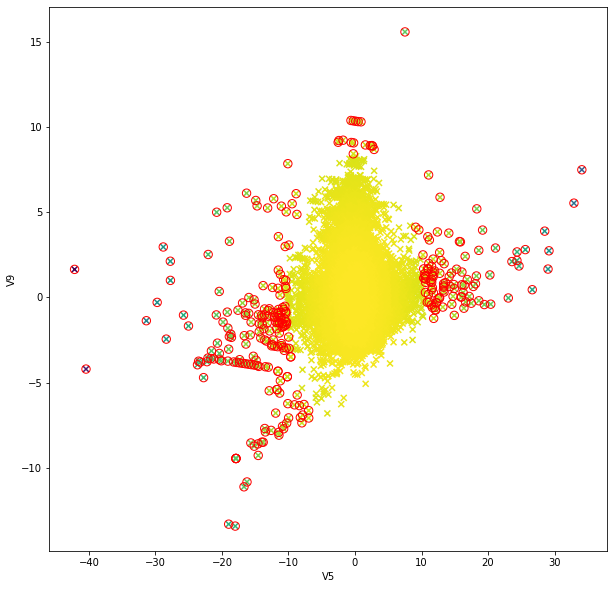

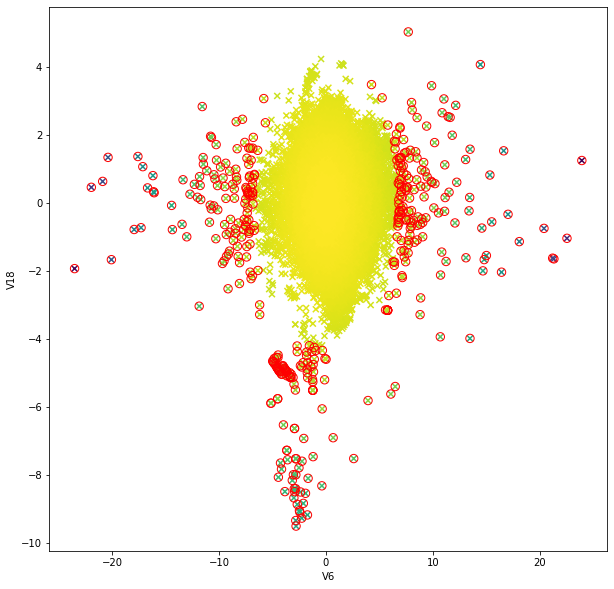

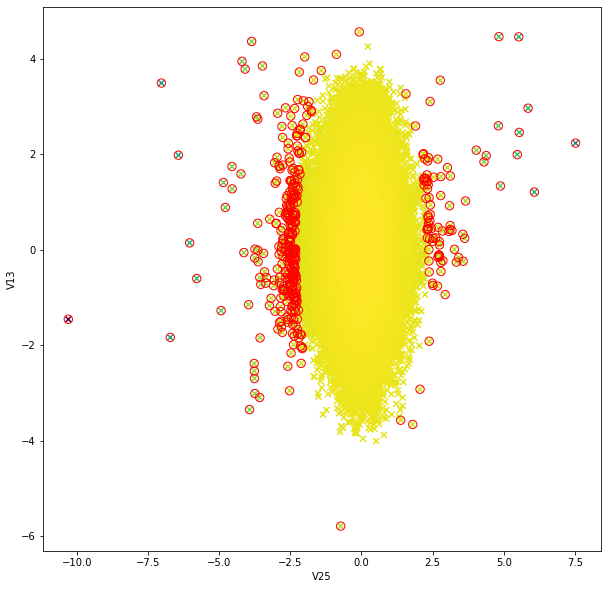

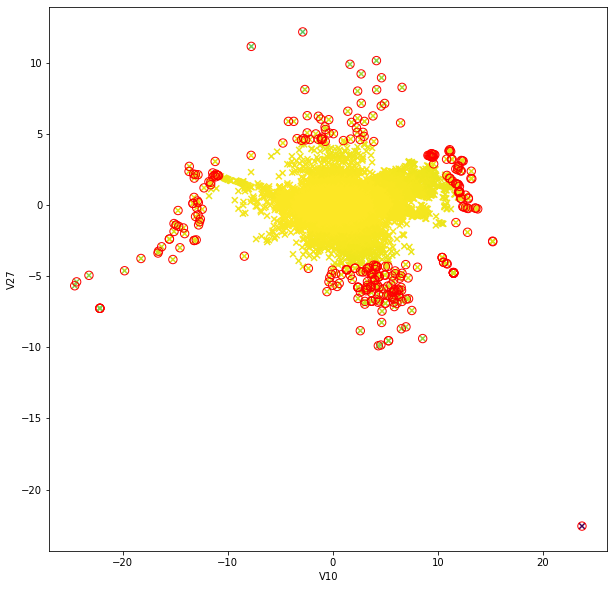

In [50]:
gm4 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
List_feature_pair = [{'V5','V9'},{'V6','V18'},{'V25','V13'},{'V10','V27'}]
AUC_train_1 = []
AUC_vali_1 = []
C1_list_1 = []
C2_list_1 = []
    #print(feature)
for i in range(0,4):
    feature_train_1 = X_train[List_feature_pair[i]]
    feature_vali_1 = X_val[List_feature_pair[i]]
    gm4.fit(feature_train_1)
    c1_1 = gm4.score_samples(feature_train_1)
    c2_1 = gm4.score_samples(feature_vali_1)
    C1_list_1.append(c1_1)
    C2_list_1.append(c2_1)
    AUC_train_1.append(roc_auc_score(y_train, 1-c1_1))
    AUC_vali_1.append(roc_auc_score(y_val, 1-c2_1))

d7= pd.DataFrame(data={'Features Pairs':List_feature_pair,'AUC_train': AUC_train_1,'AUC_vali': AUC_vali_1, 'C1_List': C1_list_1, 'C2_List': C2_list_1})  

F1_score_list_1 = []
Threshold_values_1 = []

for i in range(0,4):
    c2_max = max(d7['C2_List'][i])
    c2_min = min(d7['C2_List'][i])
    temp_th_list = []
    temp_score = []
    temp_score_final = []
    threshold_final = []
    for th in range(int(c2_min),int(c2_max),10):
        temp_score.append(f1_score(y_val,d7['C2_List'][i]<th))
        temp_th_list.append(th)
    index_temp = temp_score.index(max(temp_score)) 
    threshold_temp = temp_th_list[index_temp]
    for th1 in range(threshold_temp - 10, threshold_temp + 10 ,1):
        temp_score_final.append(f1_score(y_val,d7['C2_List'][i]<th1))
        threshold_final.append(th1)
    index_temp1 = temp_score_final.index(max(temp_score_final))
    F1_score_list_1.append(max(temp_score_final))
    Threshold_values_1.append(threshold_final[index_temp1])
d6= pd.DataFrame(data={'Features Pairs':List_feature_pair,'AUC_train': AUC_train_1,'AUC_vali': AUC_vali_1, 'F1 Score': F1_score_list_1, 'Threshold_values': Threshold_values_1})
print(d6) 

First_feature = ['V5', 'V6', 'V25', 'V10']
index_1 = [5, 6, 25, 10]
Second_feature = ['V9', 'V18', 'V13', 'V27']
index_2 = [9, 18, 13, 27]
for i in range(0,4):
    plt.figure(figsize=(10,10))
    c=C1_list_1[i]
    plt.scatter(np.array(X_train[First_feature[i]]),np.array(X_train[Second_feature[i]]),c=C1_list_1[i],cmap='viridis',marker='x')
    threshold= Threshold_values_1[i]
    outliers = np.nonzero(c<threshold)[0]
    plt.scatter(X_train.iloc[outliers,index_1[i]],X_train.iloc[outliers,index_2[i]],marker="o",facecolor= "none",edgecolor="r",s=70)
    plt.xlabel(First_feature[i])
    plt.ylabel(Second_feature[i])
    plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [51]:
gm2 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gm1 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
F1_score_list1 = []
Feature_list1 = []
list_of_C = []
Final_F1_list = []
Final_C_list = []
F1_score_list_train = []
for i in range(1,29):
    #print(feature)
    feature_train = X_train.iloc[::,i].values.reshape((-1,1))
    feature_vali = X_val.iloc[::,i].values.reshape((-1,1))
    feature_train_fraud = X_train_fraud.iloc[::,i].values.reshape((-1,1))
    feature_train_non = X_train_non.iloc[::,i].values.reshape((-1,1))
    gm2.fit(feature_train_fraud)
    gm1.fit(feature_train_non)
    S2 = gm2.score_samples(feature_vali)    
    S1 = gm1.score_samples(feature_vali)
    S1_train = gm1.score_samples(feature_train)
    S2_train = gm2.score_samples(feature_train)
    for c in np.arange(0,10.1,0.1):
        F1_score_list1.append(f1_score(y_val,S1 < c * S2 ))
        list_of_C.append(c)
    Max_f1_score = max(F1_score_list1)
    Max_C_value = list_of_C[F1_score_list1.index(max(F1_score_list1))]
    F1_score_list_train.append(f1_score(y_train,S1_train < Max_C_value * S2_train ))
    Final_C_list.append(Max_C_value)
    Final_F1_list.append(Max_f1_score)
Final_max_f1 = max(Final_F1_list)
Final_max_f1_train = max(F1_score_list_train) 
Final_max_C = Final_C_list[Final_F1_list.index(max(Final_F1_list))]
Final_max_C_train = Final_C_list[F1_score_list_train.index(max(F1_score_list_train))]
Feature_for_max_f1 = df.columns.values[Final_F1_list.index(max(Final_F1_list))+1]
Feature_for_max_f1_train = df.columns.values[F1_score_list_train.index(max(F1_score_list_train))+1]
#We are using Same Maximum value of C which we obtained from Valiation F1 score calculation, for Calculating Training F1 score.
print("We will get max value of F1 Score for Validation Set: %0.4f" % Final_max_f1, "  With C value of:", Final_max_C, "    For Feature:", Feature_for_max_f1)
print("We will get max value of F1 Score for Training Set: %0.4f" % Final_max_f1_train, "  With C value of: %0.1f" % Final_max_C_train, "    For Feature:", Feature_for_max_f1_train)  

We will get max value of F1 Score for Validation Set: 0.6545   With C value of: 7.2     For Feature: V17
We will get max value of F1 Score for Training Set: 0.6831   With C value of: 4.8     For Feature: V12


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

In [52]:
#Here we are defining one function that takes Feature list, No. of Gaussian and No. of components as input.
#Feature_list is an array of Index of Features
#G is no. of gaussian curves
#t is no. of components till we need to calculate f1 score.we will run loop for no. of components from 1,2..t.
def Model(Feature_list, G, t):
    Final_max_f1_train = []
    Threshold_values = []
    Final_F1_list = []
    AUC_train = []
    AUC_vali = []
    C1_list = []
    C2_list = [] 
    for n in range(1,t+1):
        if G == 2:
          gma = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
          gmb = GaussianMixture(n_components = n,covariance_type = 'full', random_state=0, )
          F1_score_list = []
          C_list = []
          feature_train = X_train.iloc[::,Feature_list]
          feature_vali = X_val.iloc[::,Feature_list]
          feature_train_fraud = X_train_fraud.iloc[::,Feature_list]
          feature_train_non = X_train_non.iloc[::,Feature_list]
          gma.fit(feature_train_non)
          gmb.fit(feature_train_fraud)
          Sa = gma.score_samples(feature_vali)    
          Sb = gmb.score_samples(feature_vali)
          S1_train = gma.score_samples(feature_train)
          S2_train = gmb.score_samples(feature_train)
          for c in np.arange(0,10.1,0.1):
              F1_score_list.append(f1_score(y_val,Sa < c * Sb ))
              C_list.append(c)
          Max_f1_score = max(F1_score_list)
          Max_C_value = C_list[F1_score_list.index(max(F1_score_list))]
          Final_max_f1_train.append(f1_score(y_train,S1_train < Max_C_value * S2_train ))
          Threshold_values.append(Max_C_value) # as a threshold
          Final_F1_list.append(Max_f1_score) 
        else:
          gmc = GaussianMixture(n_components = n,covariance_type = 'full', random_state=0, )
          feature_train = X_train.iloc[::,Feature_list]
          feature_vali = X_val.iloc[::,Feature_list]
          gmc.fit(feature_train)
          c1 = gmc.score_samples(feature_train)
          c2 = gmc.score_samples(feature_vali)
          C1_list.append(c1)
          C2_list.append(c2)
          AUC_train.append(roc_auc_score(y_train, 1-c1))
          AUC_vali.append(roc_auc_score(y_val, 1-c2))
          c2_max = max(C2_list[n-1])
          c2_min = min(C2_list[n-1])
          temp_th_list = []
          temp_score = []
          temp_score_final = []
          threshold_final = []
          for th in range(int(c2_min),int(c2_max),10):
              temp_score.append(f1_score(y_val,C2_list[n-1]<th))
              temp_th_list.append(th)
          index_temp = temp_score.index(max(temp_score)) 
          threshold_temp = temp_th_list[index_temp]
          for th1 in range(threshold_temp - 10, threshold_temp + 10 ,1):
              temp_score_final.append(f1_score(y_val,C2_list[n-1]<th1))
              threshold_final.append(th1)
          index_temp1 = temp_score_final.index(max(temp_score_final))
          Final_F1_list.append(max(temp_score_final))
          Threshold_values.append(threshold_final[index_temp1])
          Final_max_f1_train.append(f1_score(y_train,C1_list[n-1]<threshold_final[index_temp1]))
    return Final_F1_list, Final_max_f1_train, Threshold_values, AUC_train, AUC_vali

In [53]:
#Taking Features Arrays for Creating model
A1 = np.array([11,13,15,18,20,27])
A2 = np.array([15,2,5,3,9,6,16,23,26,17,12,22])
A3 = np.array([21,2,3,24,5,6,27,8,19,10,11,12,13,14,15,16,17,18,20,25])
A4 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
A5 = np.array([2,4,5,6,7,8,9,23,26,28,12,14,15,21,20])


#Here we will create 30 different models with combinations of No. of Gaussian curves,No. of features and No. of components for Fraudulent data.
K1 = Model(A1,1,4)
K2 = Model(A1,2,5)
K3 = Model(A2,2,5)
K4 = Model(A3,2,6)
K5 = Model(A4,2,5)
K6 = Model(A5,2,5)

#Merging all results to create final table for comparison of data

Feat_A1 = df.columns.values[A1]
Feat_A2 = df.columns.values[A2]
Feat_A3 = df.columns.values[A3]
Feat_A4 = df.columns.values[A4]
Feat_A5 = df.columns.values[A5]
Feat_List = []
for w in range(1,31):
  if w < 10:
    Feat_List.append(Feat_A1)
  elif w < 15:
    Feat_List.append(Feat_A2)
  elif w < 21:
    Feat_List.append(Feat_A3)
  elif w < 26:
    Feat_List.append(Feat_A4)
  elif w < 31:
    Feat_List.append(Feat_A5)

Not_App = ['NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA','NA']
N_Comp1 = [1,2,3,4]
N_Comp2 = [1,2,3,4,5]
N_Comp3 = [1,2,3,4,5,6]
Model_F1_Score = K1[0]+K2[0]+K3[0]+K4[0]+K5[0]+K6[0]
Model_F1_Score_train = K1[1]+K2[1]+K3[1]+K4[1]+K5[1]+K6[1]
Threshold = K1[2]+K2[2]+K3[2]+K4[2]+K5[2]+K6[2]
Area_Under_Curve_t = K1[3] + Not_App
Area_Under_Curve_V = K1[4] + Not_App
No_Comp = N_Comp1+N_Comp2+N_Comp2+N_Comp3+N_Comp2+N_Comp2
d8= pd.DataFrame(data={'Threshold(Th or C)': Threshold,'No of Components':No_Comp, 'AUC_train': Area_Under_Curve_t,'AUC_vali': Area_Under_Curve_V, 'F1 Score Vali': Model_F1_Score, 'F1 Score Train': Model_F1_Score_train,'Feature List':Feat_List})
d8

,Threshold(Th or C),No of Components,AUC_train,AUC_vali,F1 Score Vali,F1 Score Train,Feature List
0,-61.0,1,0.914695,0.882737,0.137931,0.130384,"[V11, V13, V15, V18, V20, V27]"
1,-22.0,2,0.920069,0.880508,0.253012,0.288037,"[V11, V13, V15, V18, V20, V27]"
2,-25.0,3,0.918299,0.882377,0.297030,0.259188,"[V11, V13, V15, V18, V20, V27]"
3,-18.0,4,0.922522,0.886341,0.278351,0.288557,"[V11, V13, V15, V18, V20, V27]"
4,5.6,1,NA,NA,0.269663,0.257206,"[V11, V13, V15, V18, V20, V27]"
5,5.8,2,NA,NA,0.196429,0.261818,"[V11, V13, V15, V18, V20, V27]"
6,6.8,3,NA,NA,0.275000,0.270531,"[V11, V13, V15, V18, V20, V27]"
7,6.2,4,NA,NA,0.271605,0.254808,"[V11, V13, V15, V18, V20, V27]"
8,6.8,5,NA,NA,0.268293,0.241546,"[V11, V13, V15, V18, V20, V27]"
9,3.9,1,NA,NA,0.631579,0.630745,"[V15, V2, V5, V3, V9, V6, V16, V23, V26, V17, ..."


In [54]:
#Sorting Values for max F1 score
d9 = d8.sort_values(by = 'F1 Score Vali', ascending=[False])
d9

,Threshold(Th or C),No of Components,AUC_train,AUC_vali,F1 Score Vali,F1 Score Train,Feature List
24,7.4,5,NA,NA,0.766667,0.817365,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,..."
23,8.0,4,NA,NA,0.762712,0.813253,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,..."
22,6.4,3,NA,NA,0.754098,0.803571,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,..."
19,5.4,6,NA,NA,0.733333,0.812883,"[V21, V2, V3, V24, V5, V6, V27, V8, V19, V10, ..."
18,5.4,5,NA,NA,0.733333,0.812883,"[V21, V2, V3, V24, V5, V6, V27, V8, V19, V10, ..."
17,5.5,4,NA,NA,0.733333,0.803030,"[V21, V2, V3, V24, V5, V6, V27, V8, V19, V10, ..."
21,8.2,2,NA,NA,0.728814,0.782875,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,..."
10,2.7,2,NA,NA,0.697674,0.707989,"[V15, V2, V5, V3, V9, V6, V16, V23, V26, V17, ..."
16,3.5,3,NA,NA,0.680556,0.723514,"[V21, V2, V3, V24, V5, V6, V27, V8, V19, V10, ..."
12,3.2,4,NA,NA,0.672000,0.707965,"[V15, V2, V5, V3, V9, V6, V16, V23, V26, V17, ..."


In [55]:
print("Our Best model's features are:",d9['Feature List'][24])
print("No. of components are:", d9['No of Components'][24])
print("F1 score for validation:",d9['F1 Score Vali'][24])
print("F1 score for training:",d9['F1 Score Train'][24])
print("Threshold value:", d9['Threshold(Th or C)'][24])

Our Best model's features are: ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25']
No. of components are: 5
F1 score for validation: 0.7666666666666666
F1 score for training: 0.8173652694610779
Threshold value: 7.4


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [56]:
gma = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
gmb = GaussianMixture(n_components = 5,covariance_type = 'full', random_state=0, )
feature_train = X_train.iloc[::,A4]
feature_test = X_test.iloc[::,A4]
feature_train_fraud = X_train_fraud.iloc[::,A4]
feature_train_non = X_train_non.iloc[::,A4]
gma.fit(feature_train_non)
gmb.fit(feature_train_fraud)
S1_test = gma.score_samples(feature_test)
S2_test = gmb.score_samples(feature_test)
F1_score = f1_score(y_test,S1_test < 7.4 * S2_test)
precision = precision_score(y_test, S1_test < 7.4 * S2_test) 
recall = recall_score(y_test, S1_test < 7.4 * S2_test) 
print("F1 Score for test set is: %0.4f" % F1_score, "    Precision value is:%0.4f" % precision, "      Recall value is:", recall)

F1 Score for test set is: 0.8235     Precision value is:0.8630       Recall value is: 0.7875


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




There are multiple type of distribution models used for different purposes.


*   Exponential distribution
*   Beta distribution
*   Cauchy distribution 
*   Poission Distribution
*   Chi-Square Distribution
*   Logistic Distribution

--The exponential distribution is a continuous probability distribution where a few outcomes are the most likely with a rapid decrease in probability to all other outcomes.This distribution are useful for estimation of event like time estimation of failing part.

--Poisson distribution approximates the number of times an event occurs in a given interval, knowing that the occurrences are independent, there is no upper limit to the the number of events and the average number of occurrences must remain the same if we extended the analysis form one interval to another. This distribution has one parameter, lambda being the average number of events per interval.

--Logistic distribution is used to describe population growth over time or chemical reactions.

--Beta distribution is commonly used to represent variability over a fixed range., for instance to model the behavior of random variables limited to intervals of finite length. It is also a suitable choice to model percentage or proportions.

--Cauchy distribution is employed in mechanical and electrical theory, physical anthropology and measurement and calibration problems.

--Chi-square distribution is predominantly used in hypothesis testing, in the construction of confidence intervals, in the evaluation of the goodness of fit of an observed distribution to a theoretical one.

For out Outlier detection data we can use,

1.   Dbscan (Density Based Spatial Clustering of Applications with Noise)
2.   Statastical methods like Z-score calculation

References

https://www.analyticssteps.com/blogs/10-types-statistical-data-distribution-models

https://en.wikipedia.org/wiki/List_of_probability_distributions

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

https://medium.com/@ciortanmadalina/overview-of-data-distributions-87d95a5cbf0a

https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/